# Homework 3

## Message from your Prof
> **Remember for the best way to learn this content, and maximize your learning experience, you must implement these models yourself and only use imports for checking your work**

You can only import classification_report from sklearn evaluation metrics (you do not need to implement classification report), but you have to implement the train_test_split, and the classifiers yourselves. You will need to use numpy or pandas as inputs for your models. You should only use the imports listed below to check your work.

Students that do not practice their own implementations **will be cooked** in their skill assessments. I do not want to hear students complaining they did poorly because the homeworks did not reflect the skill assessments. YOU HAVE BEEN WARNED!!!

<br>
In this assignment, we are working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Background and Data Information
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset.

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

### Libraries that can be used: numpy, scipy, pandas, scikit-learn, matplotlib, seaborn
Any libraries used in the discussion and lecture materials are also allowed.

In [5]:
!git clone https://github.com/ucsd-cse151a-ss25/hw3.git

fatal: destination path 'hw3' already exists and is not an empty directory.


# Exercises
## Exercise 1 - Agglomerative Clustering (20 points in total)

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >

### Exercise 1.1 - Choosing Parameters (5 points)

 - Explain why you would pick these parameters.
     - Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
     - Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
     - What should the threshold distance be?

Hints:
 - How the distance threshold works: Whenever two clusters are picked to consider merging them, the distance between those clusters is compared to the distance threshold. If the distance is smaller than the threshold, the clusters merge and the algorithm continues; Otherwise, they will not be merged.
 - How to choose a linkage rule: Think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('./hw3/bitstrings.csv') # change filename location based on your setup

df

,b15,b14,b13,b12,b11,b10,b9,b8,b7,b6,b5,b4,b3,b2,b1,b0
0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0
1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
4,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1
1196,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,0
1197,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1
1198,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1


Explain why you would pick these parameters:

**1. Which linkage rule should be used? (single-linkage, completely-linkage, or average-linkage)**  
Single-linkage makes the most sense because we only care if a new bitstring is one bit away from ANY bitstring in the current cluster. The new bitstring doesn't need to be 1 bit away from all bitstrings in the cluster, and I'm unsure why taking the average would even be applicable here.

**2. Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)**  
Since we're concerned with the number of bits that are different in each bitstring, Manhattan distance seems to make the most sense. For instance, if we calculate the distance formulas for the bitstrings 0000 and 0110, euclidean distance gives us 1.414, cosine distance gives us a divide by zero issue, and manhattan distance gives us 2, which is the accurate "distance" for these bitstrings.

**3. What should the threshold distance be?**  
We want to threshold at 1 because we care about bitstrings that are 1 bit away from the cluster, not bitstrings that are more that 1 bit away from the cluster.

From the previous example, single-linkage using Manhattan distance, with a threshold of 1 will give us the {0000, 0010, 0100}, {1100} equivalence classes.

### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (15 points)

 - Perform the agglomerative clustering with the parameters you picked in the above three questions.
 - Show the frequency(number of members) of each cluster. You are encouraged to create a bar chart to show the distribution as it will help you in Exercise 2, but printing only the numbers is also fine.

Hints:
 - The value of ```distance_threshold``` in the arguments should be **slightly** higher than what you picked. This is because we only merge two clusters when their distance is **strictly smaller** than the threshold.


Hierarchical Cluster Labels: [25, 29, 29, 30, 28, 28, 25, 29, 30, 31, 28, 27, 31, 31, 31, 31, 31, 29, 31, 31, 28, 28, 30, 30, 31, 30, 26, 26, 28, 27, 31, 25, 29, 29, 29, 29, 31, 26, 25, 31, 26, 31, 26, 26, 26, 27, 31, 31, 31, 26, 30, 0, 28, 29, 28, 30, 28, 31, 30, 30, 29, 31, 30, 31, 28, 31, 25, 31, 31, 28, 28, 31, 27, 31, 31, 31, 31, 31, 30, 1, 30, 30, 27, 25, 31, 30, 30, 30, 30, 27, 30, 30, 30, 26, 26, 26, 26, 26, 26, 26, 30, 26, 26, 26, 26, 28, 28, 26, 28, 26, 28, 26, 29, 30, 30, 30, 25, 30, 30, 30, 27, 25, 25, 25, 31, 29, 29, 29, 25, 26, 25, 25, 25, 31, 29, 29, 27, 28, 28, 28, 28, 27, 28, 26, 31, 28, 28, 28, 28, 31, 28, 28, 28, 28, 28, 28, 28, 28, 28, 30, 31, 28, 29, 28, 31, 31, 31, 31, 28, 26, 31, 31, 28, 27, 28, 28, 27, 30, 30, 26, 31, 28, 28, 30, 31, 29, 29, 25, 30, 30, 2, 30, 30, 30, 27, 26, 28, 3, 31, 30, 31, 31, 31, 30, 27, 25, 27, 27, 27, 27, 27, 27, 30, 31, 31, 28, 29, 29, 26, 29, 26, 31, 29, 30, 30, 30, 30, 31, 25, 30, 27, 26, 30, 30, 29, 28, 29, 29, 29, 29, 29, 31, 30, 3

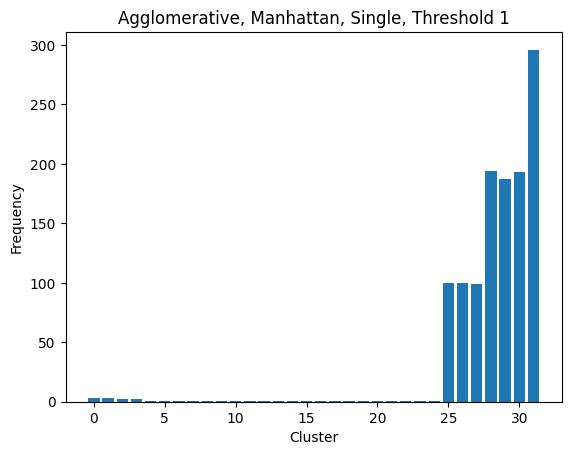

In [16]:
# Perform agglomerative clustering
# Use single-linkage, Manhattan distance, and threshold of 1
# The value of distance_threshold in the arguments should be slightly higher
# than what you picked because we only merge two clusters when their distance is
# strictly smaller than the threshold

import matplotlib.pyplot as plt

def manhattan_distance(p1, p2):
    """Calculates the Manhattan distance between two points."""
    return np.sum(np.abs(p1 - p2))

def calculate_cluster_distance(X, cluster1, cluster2, linkage_method='single'):
    """
    Calculates the distance between two clusters based on the linkage method.

    Parameters
    ----------
    cluster1, cluster2 : list of indices
        Lists of indices of data points belonging to each cluster.
    linkage_method : str
        'single', 'complete', or 'average'.

    Returns
    -------
    distance : float
        The calculated distance between the clusters.
    """
    if linkage_method == 'single':
        return min(manhattan_distance(X[i], X[j]) for i in cluster1 for j in cluster2)
    elif linkage_method == 'complete':
        return max(manhattan_distance(X[i], X[j]) for i in cluster1 for j in cluster2)
    elif linkage_method == 'average':
        return np.mean([manhattan_distance(X[i], X[j]) for i in cluster1 for j in cluster2])
    else:
        raise ValueError("Invalid linkage method")


def hierarchical_clustering_from_scratch(X, distance_threshold, linkage_method='single'):
    """
    Agglomerative Hierarchical Clustering from scratch using NumPy.

    Parameters
    ----------
    X : (n_samples, n_features) ndarray
        The input data.
    n_clusters : int
        The desired number of clusters to stop at.
    linkage_method : str
        'single', 'complete', 'average'.

    Returns
    -------
    labels : (n_samples,) ndarray
        Cluster labels for each sample.
    """
    n_samples = X.shape[0]
    # Initially, each data point is its own cluster
    clusters = [[i] for i in range(n_samples)]

    # Merge clusters until the desired number of clusters is reached
    while True: # Just break if outside of distance_threshold
        min_distance = float('inf')
        merge_indices = (-1, -1)

        # Find the two closest clusters
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = calculate_cluster_distance(X, clusters[i], clusters[j], linkage_method)
                if dist < min_distance:
                    min_distance = dist
                    merge_indices = (i, j)

        if min_distance >= distance_threshold:
            break # DO NOT MERGE IF OVER THRESHOLD

        # Merge the two closest clusters
        idx1, idx2 = merge_indices
        merged_cluster = clusters[idx1] + clusters[idx2]
        clusters.pop(idx2) # Remove the second cluster first to avoid index issues
        clusters.pop(idx1)
        clusters.append(merged_cluster)

    # Assign labels based on the final clusters
    labels = np.zeros(n_samples, dtype=int)
    for i, cluster in enumerate(clusters):
        for data_index in cluster:
            labels[data_index] = i

    return labels

# Apply Hierarchical Clustering from scratch
# Takes too long, count frequencies
frequencies = df.value_counts().reset_index(name="frequencies")
# Create new array without duplicates
nodups = frequencies.iloc[:, :-1]
X = nodups.to_numpy(dtype=int)
hierarchical_labels = hierarchical_clustering_from_scratch(X, distance_threshold=1.01, linkage_method='single')

# Add frequencies back in
frequencies["labels"] = hierarchical_labels
cluster_qty = frequencies.groupby("labels")["frequencies"].sum()

# Show the frequency (# of members) of each cluster
print("\nHierarchical Cluster Labels:", hierarchical_labels.tolist())

# Create a barchart to show the distribution
# Visualize Hierarchical Clustering results
plt.bar(cluster_qty.index, cluster_qty.values)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Agglomerative, Manhattan, Single, Threshold 1')
plt.show()

## Exercise 2 - K-Means Clustering (20 points in total)

Let's see how k-means behave differently from agglomerative clustering.

### Exercise 2.1 - K-Means Clustering for Equivalence Classes (10 points)
 - Re-cluster the dataset with k-means, but with the number of clusters you obtained from Exercise 1.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.

### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering (10 points)

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain
 - How the two results are different
 - Why there is such a difference

## Exercise 3 - Principal Component Analysis (30 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 3.1 - Generate 2 Clusters (10 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

### Exercise 3.2 - PCA for Feature Extraction (20 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

## Exercise 4 - Singular Value Decomposition (25 points in total)

Let's decompose our data set into left and right matrices to find unknown structure in our data

### Exercise 4.1 - Generate the [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) (10 points)

 - Generate multiple SVD's using 2, 3 and 4 components ```k=2, k=3 and k=4```.
 Give each SVD it's own python variable.
 - Calculate a pairwise cosine similarity of our kxn matrix for n features (should result in an nxn matrix)
 - Generate Pair plots for the left and right matrices.
 - Evaluate your results and what can you extract from the results of k=2, k=3 and k=4 dimensional reductions?

**Before performing SVD, let's first calculate our Eigen values and Eigen vectors of our matrix**

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(np.array(df).T @ np.array(df))

In [ ]:
# Let's evaluate our values. You can use this for your final evaluation for 4.1
eigen_values

In [ ]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Here we generate an SVD using k = 5 yielding u,s,v of mx5, 5x5, nx5.T
X = df.values
U, s, Vt = np.linalg.svd(X, full_matrices=False)

In [ ]:
k = 5
U_k = U[:, :k]                # m × 5
s_k = s[:k]                   # length-5 vector
Vt_k = Vt[:k, :]              # 5 × n

In [ ]:
explained_variance = (s_k**2) / (X.shape[0] - 1)
total_var = (s**2).sum() / (X.shape[0] - 1)
explained_variance_ratio = explained_variance / total_var

print("Explained variance ratio:", explained_variance_ratio) # Prints the explained variance for each of the 5 components
print("Sum of top-5 ratios:", explained_variance_ratio.sum()) # Prints the sum of the 5 from above
sigma_matrix = np.diag(s_k)  # Creates the sigma matrix from the singular values
print("Sigma matrix:\n", sigma_matrix) # Prints the sigma matrix
print("Singular values:", s_k) # Our singular values

In [ ]:
# We will define our cosine similarity function
def cosine_similarity(a, b):
    """Calculates the cosine similarity between two vectors."""
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

In [ ]:
right_matrix = pd.DataFrame(Vt_k)
print("Right matrix shape:", right_matrix.shape) # lets check the shape

In [ ]:
right_matrix

**Generate code for performing a pairwise calculation of our features using cosine_similarity**

**Let's extract our left matrix** This is similar to looking at customers with similar movie viewing habits

In [ ]:
left_matrix = pd.DataFrame((U_k * s_k) / s_k)
print("Left matrix shape:", left_matrix.shape) #let's check the shape

In [ ]:
left_matrix

**Explain your interpretation for each of the SVD's you generated for k=2, 3, 4**

### Exercise 4.2 - Generate Clusters (15 points)

 - Re-do the k-means clustering on our dataset again for the three different components created by you above, of the left matrix.
 - Show the frequency (number of members) of each cluster.
 - Generate clusters from 2 to 10
 - Use the [silhouette](https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) method to choose the best k clusters

## Exercise 4 - Collaborative Statement (5 points)
### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I did not discuss my code with anyone.  
I did utilize the StatQuest video located at: https://youtu.be/7xHsRkOdVwo?feature=shared